In [1]:
import pandas as pd
import numpy as np
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [2]:
dataset=pd.read_csv("Tatacoffee13_21.csv", parse_dates=['Date'], index_col='Date')
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [3]:
column="Close"

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data = Ms.fit_transform(dataset[[column]])
print("Len:", data.shape)

Len: (2225, 1)


In [5]:
training_size = round(len(data) * 0.80)
print(training_size)
x_train=data[:training_size]
x_test=data[training_size:]
print("x_train Length:", x_train.shape)
print("x_test Length:", x_test.shape)
y_train=data[:training_size]
y_test=data[training_size:]
print("y_train Length:", y_train.shape)
print("y_test Length:", y_test.shape)

1780
x_train Length: (1780, 1)
x_test Length: (445, 1)
y_train Length: (1780, 1)
y_test Length: (445, 1)


In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(x_train)
result = model.fit(smoothing_level=0.5, optimized=True)

C:\Anaconda3\envs\aiml\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [7]:
y_pred = result.predict(len(x_train), len(data)-1)

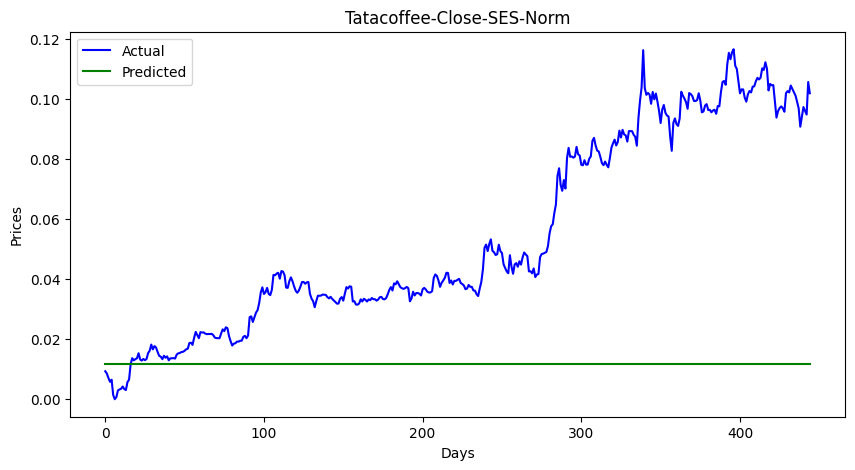

In [8]:
from stockFunctions import graph
graph(y_test, y_pred, "Actual", "Predicted", "Tatacoffee-Close-SES-Norm", "Days", "Prices")

In [9]:
from stockFunctions import conversionSingle
SES_Norm_Test_Table=conversionSingle(y_test, [column])

In [10]:
SES_Norm_Test_Table

,Close
0,0.009319
1,0.008569
2,0.007068
3,0.005817
4,0.006505
...,...
440,0.097323
441,0.096041
442,0.094821
443,0.105673


In [11]:
actual_stock_price_test_origi=Ms.inverse_transform(SES_Norm_Test_Table)

In [12]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_origi,[column])
actual_stock_price_test_oriA

,Close
0,64.3
1,63.1
2,60.7
3,58.7
4,59.8
...,...
440,205.0
441,202.95
442,201.0
443,218.35


In [13]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

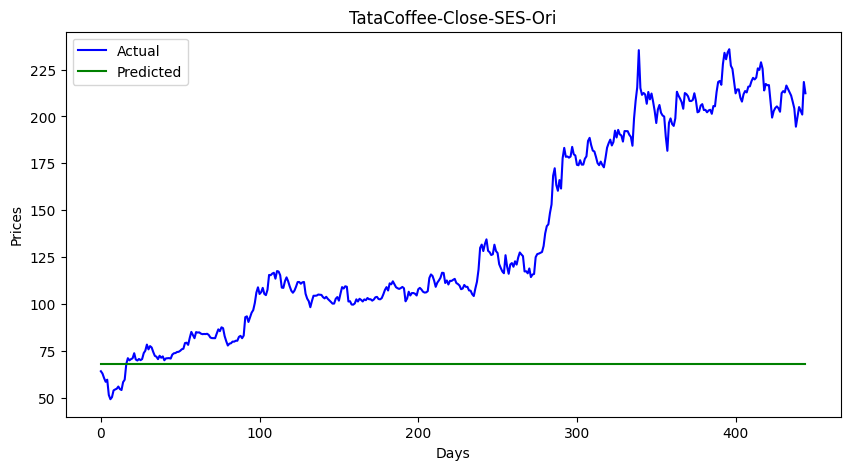

In [14]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-SES-Ori","Days","Prices")

In [15]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 85.40706509221285
maPe-Testset: 0.4300851015876765


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
forecast=result.predict(len(data), len(data)+3)
forecast

array([0.01189075, 0.01189075, 0.01189075, 0.01189075])

In [17]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [18]:
forecast_stock_price_test_oriF

,Closefore
0,68.410927
1,68.410927
2,68.410927
3,68.410927


In [19]:
forecast_stock_price_test_oriF.to_csv("CloseSES.csv",index=False)